# Лабораторная работа #3. Кластеризация

## Подготовка

Импортируем необходимые для визуализации данных:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

И модуль `time` для замера времени выполнения алгоритмов:

In [3]:
import time

Отключаем назойливые предупреждения:

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Исходные данные

### Загрузка датасета

Загружаем датасет:

In [5]:
df = pd.read_csv("data.txt", delim_whitespace=True, header=None)
df.head(5)

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


Этот датасет содержит координаты точек на плоскости $XoY$. Дадим явное название колонкам:

In [39]:
df.columns = ["x", "y"]
df.head(5)

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


Так гораздо лучше

### Визуализация

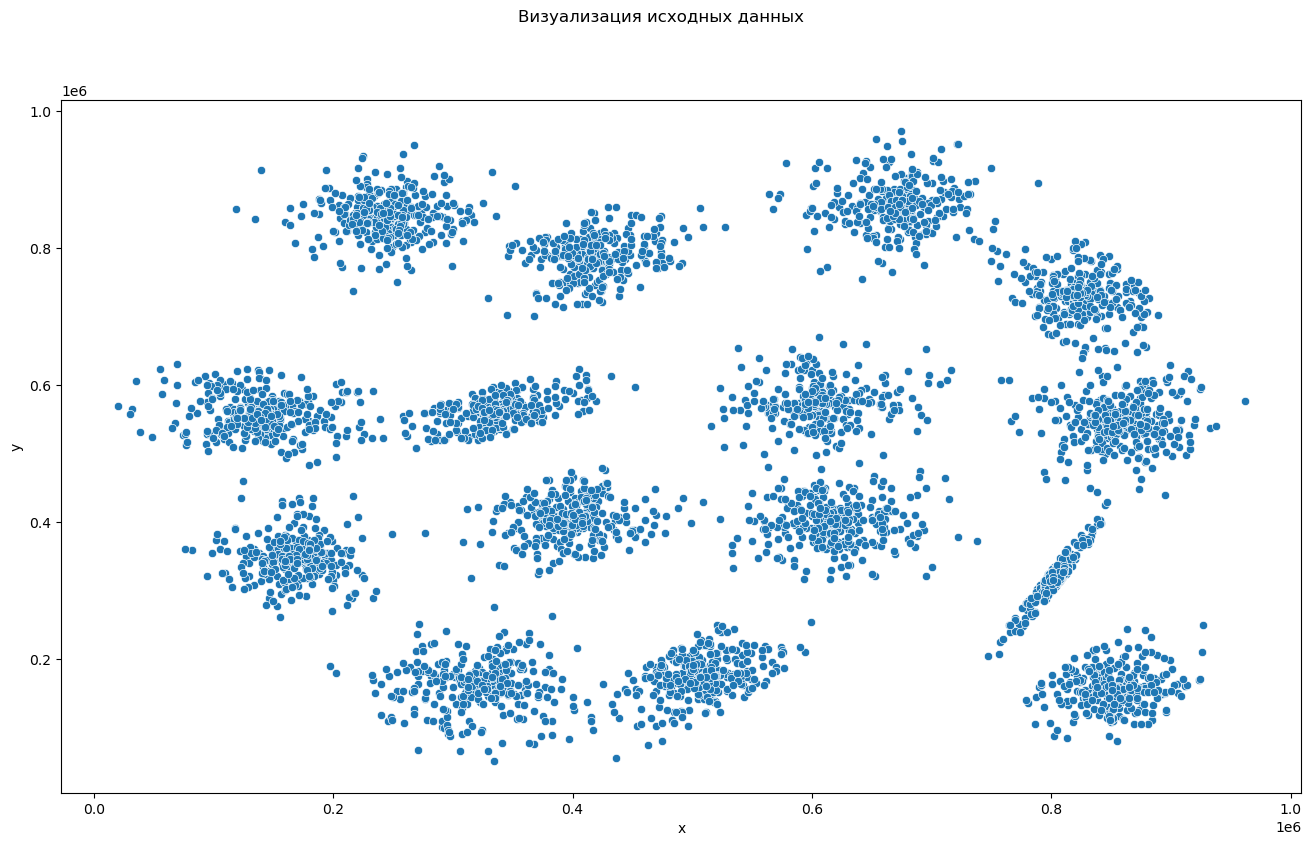

In [40]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация исходных данных")

sns.scatterplot(data=df, x="x", y="y")
plt.show()

Даже невооруженным глазом видно, что точки как-то сгруппированы. Используем алгоритмы кластеризации чтобы явно увидеть границы и размеры скоплений

## KMeans

__Суть алгоритма:__ найти центры кластеров (центроиды) и минимизировать
суммарное квадратичное отклонение точек кластеров от центров этих кластеров. Центроиды в данном алгоритме по сути выполняют роль центров масс для
остальных точек из кластера.

__Суммарное квадратичное отклонение:__
$$V = \sum_{i=1}^{k} \sum_{x \in S_i} (x - \mu_i)^2$$
где $k$ - число кластеров, $S_i$ - полученные кластеры, $i = 1, 2,..., k$, а $\mu_i$ - центры масс всех векторов $x$ из кластера $S_i$.

### Визуализация

In [41]:
start_time = time.time()

kmeans = cluster.KMeans(n_clusters = 15, n_init = "auto")
y_kmeans = kmeans.fit_predict(df)

end_time = time.time()
print(f"Время: {end_time - start_time: .3f} секунд")

Время:  0.084 секунд


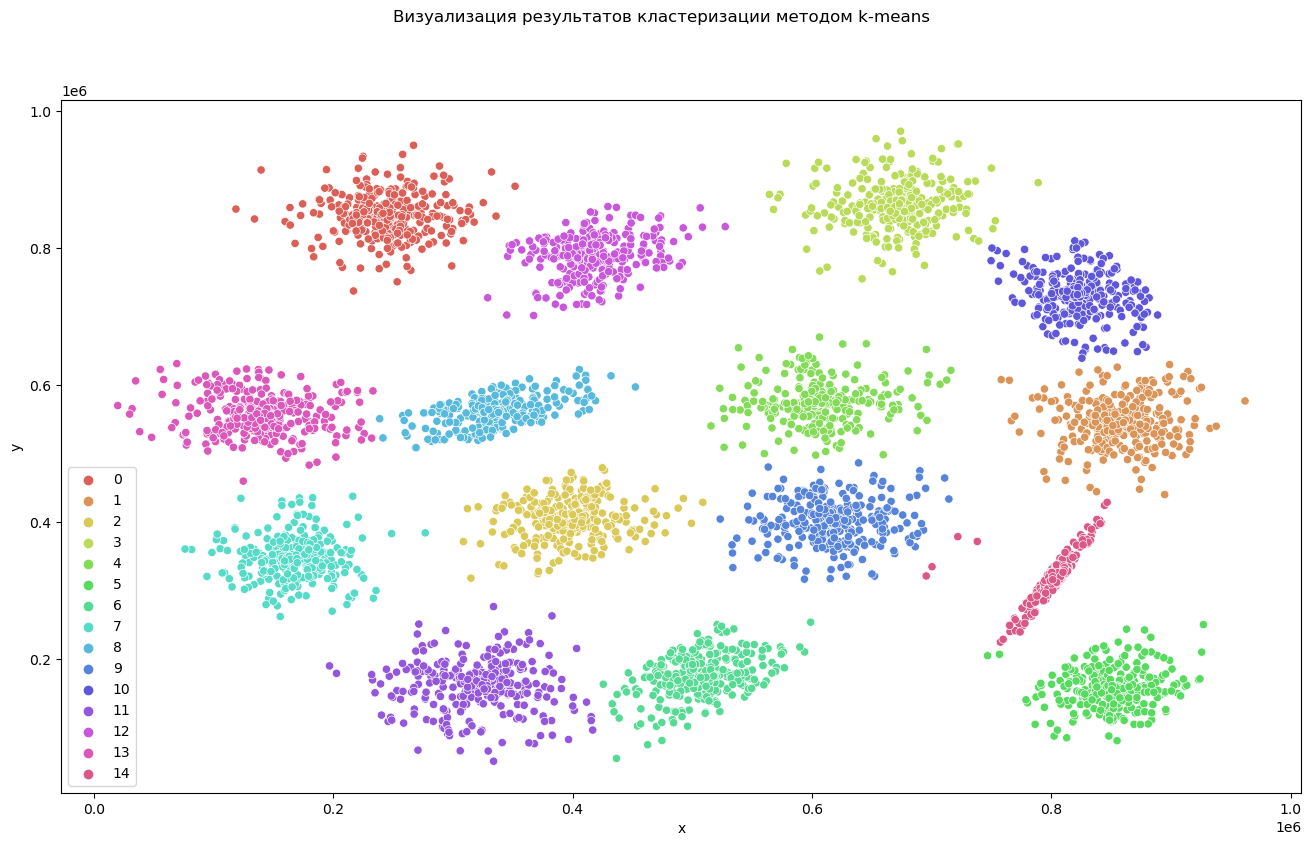

In [42]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация результатов кластеризации методом k-means")

ax = sns.scatterplot(data=df, x="x", y="y", hue=y_kmeans, legend="full", palette=sns.color_palette("hls", 15))

plt.show()

### Да/No

__Достоинства алгоритма:__
1. Хорошо работает, когда кластеры представляют собой отдельные скопления точек
2. Быстрая работа алгоритма

__Недостатки алгоритма:__
1. Не гарантируется достижение глобального минимума суммарного квадратичного отклонения $V$, а только одного из локальных минимумов
2. Результат зависит от выбора исходных центров кластеров
3. Число кластеров нужно знать заранее
4. Плохо работает с сгустками произвольной формы

## Affinity Propagation

Создает кластеры, отправляя сообщения между парами образцов до схождения. Затем набор данных описывается с использованием небольшого количества образцов, которые определяются как наиболее репрезентативные для других образцов.

Сообщения, отправляемые между парами, представляют пригодность одного образца быть образцом другого, который обновляется в ответ на значения из других пар. Это обновление происходит итеративно до сходимости, после чего выбираются окончательные образцы и, следовательно, дается окончательная кластеризация.

### Визуализация

In [43]:
start_time = time.time()

ap = cluster.AffinityPropagation(preference=-500000000000, damping = 0.95, max_iter = 1000)
y_ap = ap.fit_predict(df)

end_time = time.time()
print(f"Время: {end_time - start_time: .3f} секунд")

Время:  25.137 секунд


Чем больше параметр __preference__ для точки, тем больше вероятность того, что она будет выбрана лидером кластера.

Из-за большого количества точек образовывалось множество маленьких кластеров. Поэтому параметр __preference__ пришлось сделать очень маленьким, чтобы точки "хотели" принадлежать какому-то кластеру, а не становиться лидером нового.

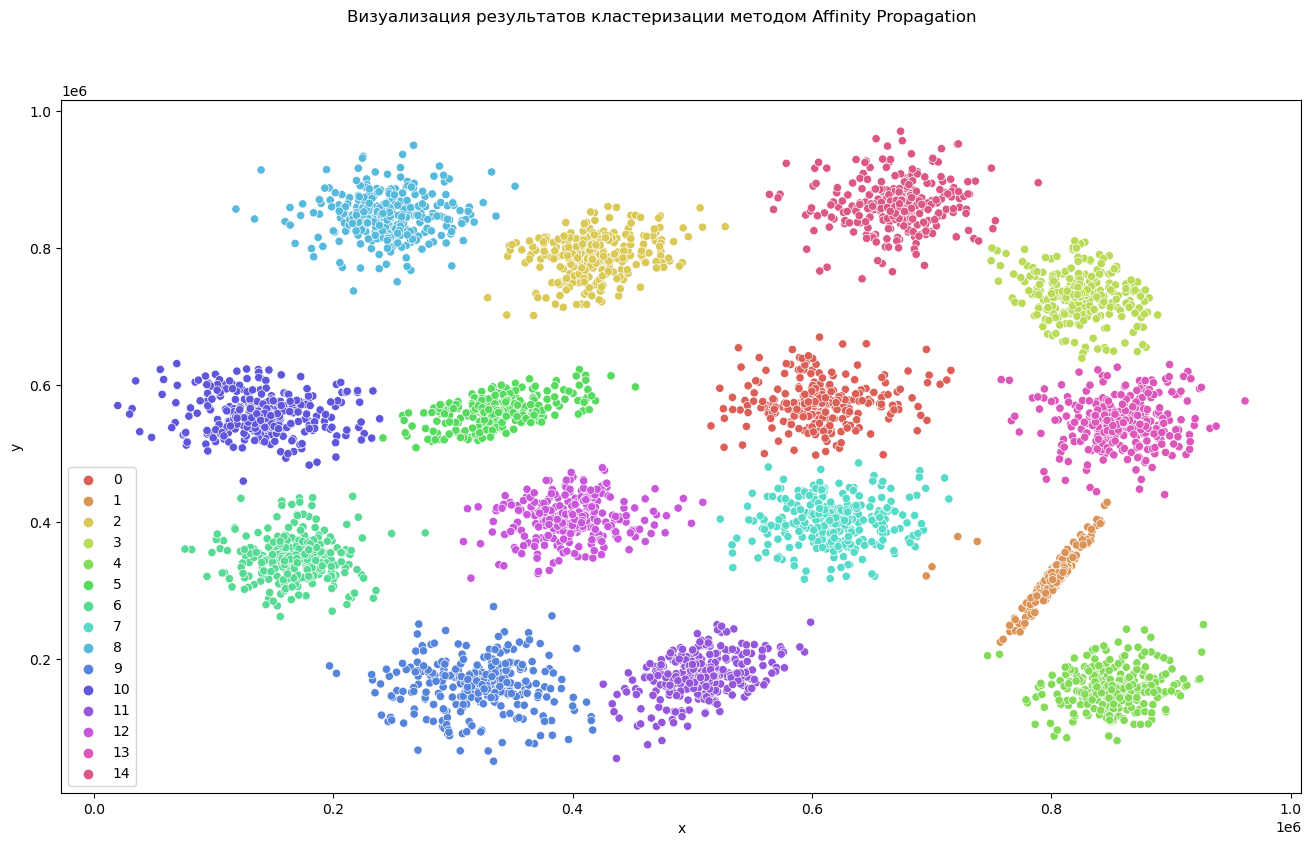

In [44]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация результатов кластеризации методом Affinity Propagation")

ax = sns.scatterplot(data=df, x="x", y="y", legend="full", hue=y_ap, palette=sns.color_palette("hls", 15))

plt.show()

### Да/No

__Достоинства алгоритма:__
1. Лучший результат, чем при использовании `k-means`

__Недостатки алгоритма:__
1. Не подходит для больших датасетов
2. Требовательный к ресурсам и времени
3. Нельзя напрямую повлиять на количество кластеров

## Mean Shift

Кластеризация, направленная на обнаружение капель в образцах с плавной плотностью.

Это алгоритм на основе центроидов, который работает, обновляя кандидатов в центроиды, чтобы они были средними точками в данном регионе. Затем эти кандидаты фильтруются на этапе постобработки, чтобы исключить почти дубликаты и сформировать окончательный набор центроидов.

### Визуализация

In [45]:
start_time = time.time()

ms = cluster.MeanShift(bandwidth=55000)
y_ms = ms.fit_predict(df)

end_time = time.time()
print(f"Время: {end_time - start_time: .3f} секунд")

Время:  7.054 секунд


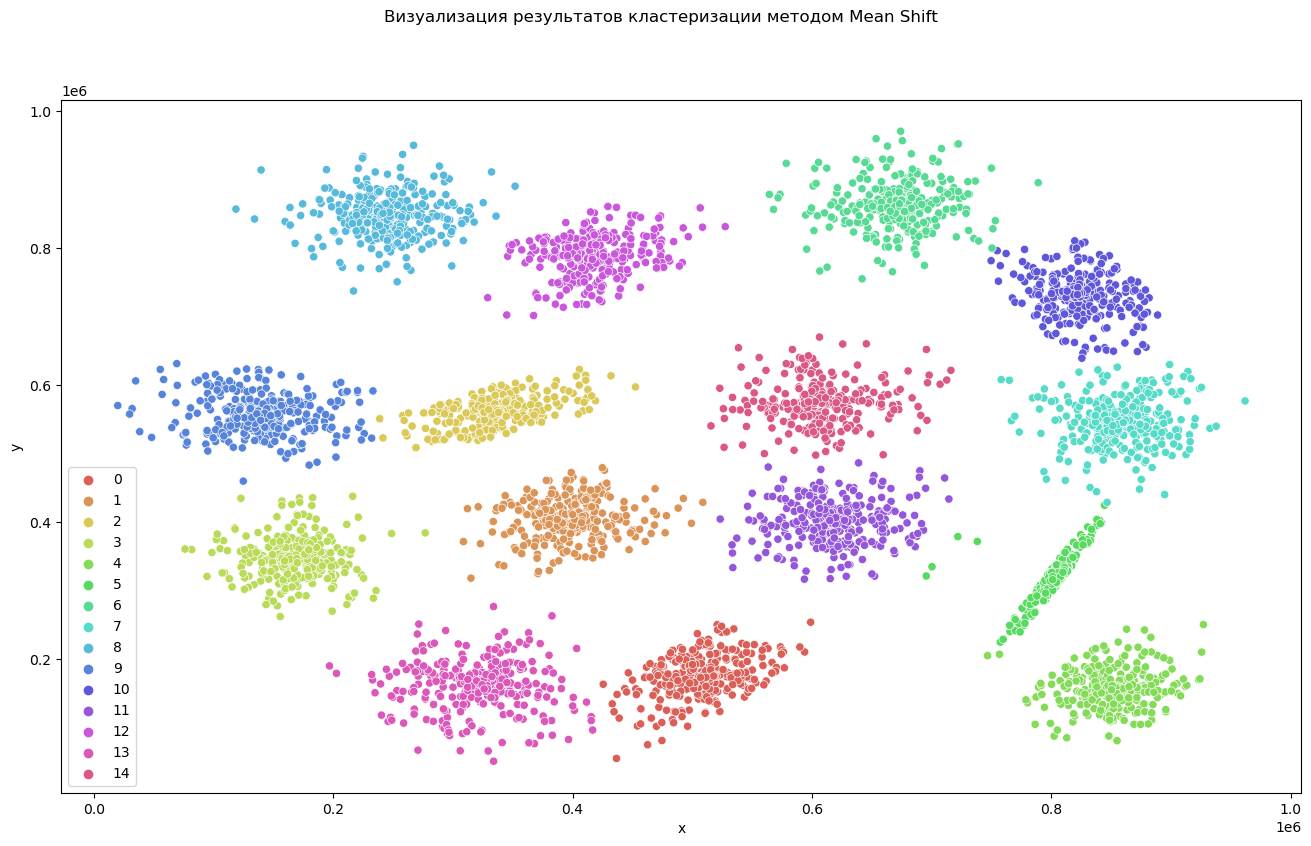

In [46]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация результатов кластеризации методом Mean Shift")

ax = sns.scatterplot(data=df, x="x", y="y", legend="full", hue=y_ms, palette=sns.color_palette("hls", 15))

plt.show()

### Да/No

__Достоинства:__
1. Процедура опирается на единственный параметр - `bandwidth`
2. Может моделировать кластеры сложной формы, например, невыпуклые

__Недостатки:__
1. Выбор подходящего `bandwidth` затруднителен
2. Нельзя напрямую повлиять на количество смоделированных кластеров
3. Не подходит для больших датасетов

## Agglomerative Clustering

Строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер. 

### Визуализация

In [52]:
start_time = time.time()

ac = cluster.AgglomerativeClustering(n_clusters=15, linkage="ward")
y_ac = ac.fit_predict(df)

end_time = time.time()
print(f"Время: {end_time - start_time: .3f} секунд")

Время:  0.330 секунд


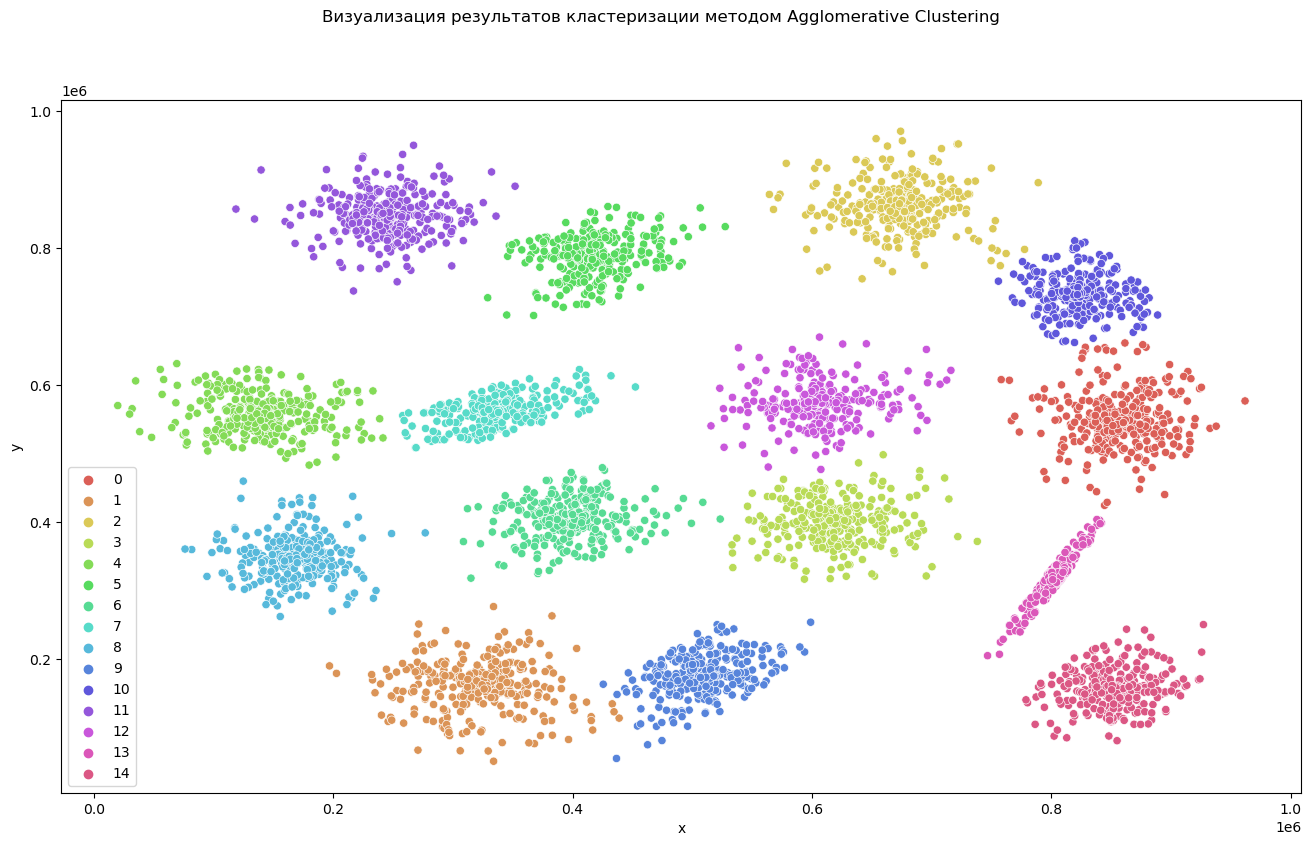

In [53]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация результатов кластеризации методом Agglomerative Clustering")

ax = sns.scatterplot(data=df, x="x", y="y", hue=y_ac, palette=sns.color_palette("hls", 15))

plt.show()

### Бонус

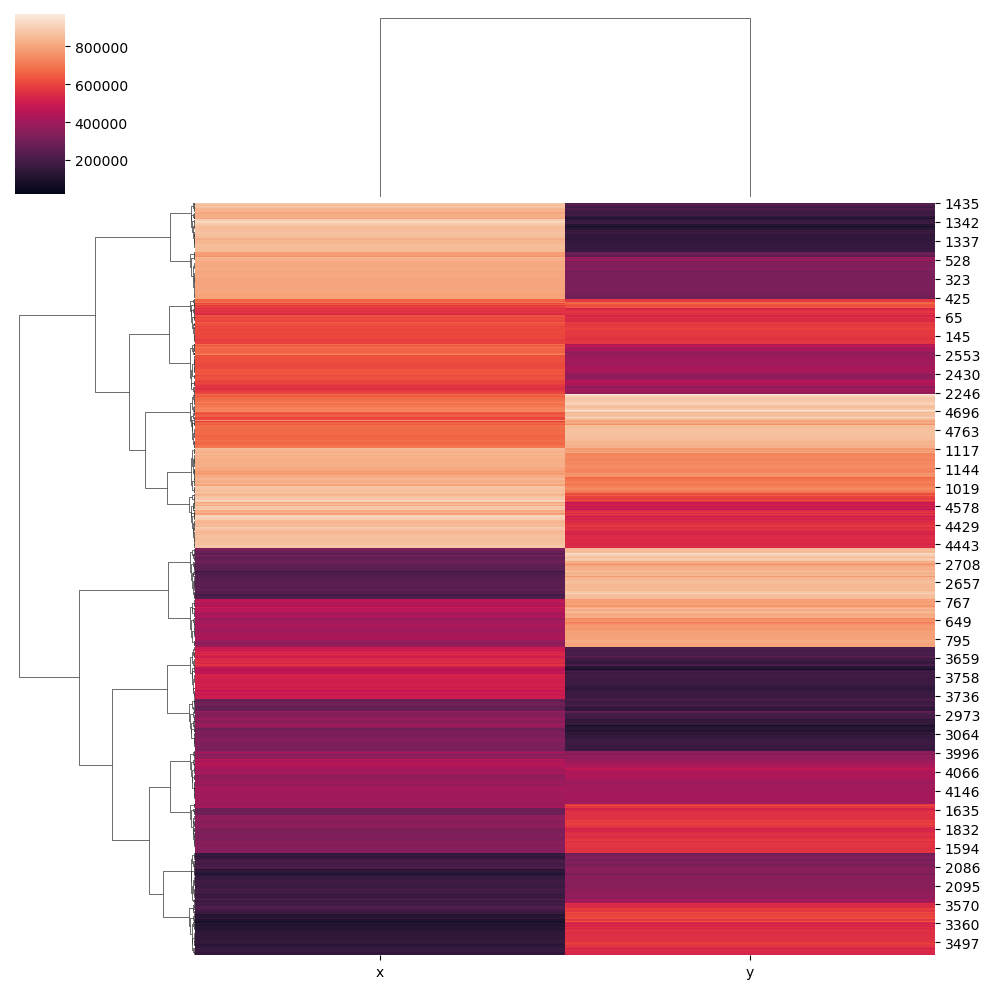

In [49]:
sns.clustermap(df, method="ward")

plt.show()

### Да/No

__Достоинства:__
1. Результат работы алгоритма можно визуализировать дендрограммой
2. Можно задать желаемое количество кластеров
3. Хорошо работает при идентификации маленьких кластеров

__Недостатки:__
1. При больших наборах данных дендрограмма не будет наглядной
2. Может смоделировать кластеры, сильно различающиеся по размеру, поэтому
3. Приходится выбирать подходящий подвид алгоритма (отличаются методом подсчета расстояния

## DBSCAN

Популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних. Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: `eps` и `min_samples`. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер.

### Визуализация

In [50]:
start_time = time.time()

db = cluster.DBSCAN(eps=20500)
y_db = db.fit_predict(df)

end_time = time.time()
print(f"Время: {end_time - start_time: .3f} секунд")

Время:  0.022 секунд


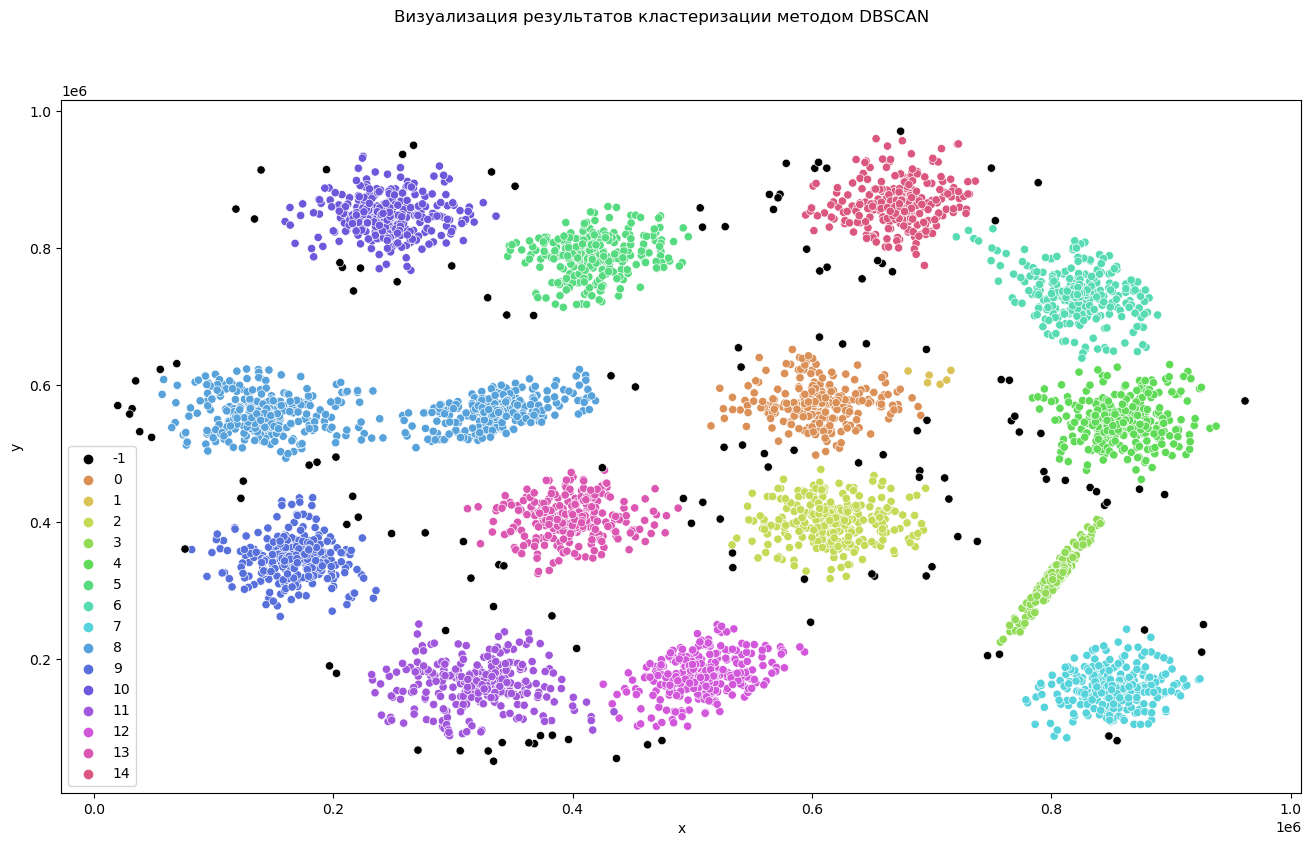

In [51]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Визуализация результатов кластеризации методом DBSCAN")

palette = sns.color_palette("hls", 16)
palette[0] = (0, 0, 0)

ax = sns.scatterplot(data=df, x="x", y="y", hue=y_db, palette=palette)

plt.show()

### Да/No

__Достоинства:__
1. Есть детерминированная реализация
2. Хорошо поддается модификации (можно скрещивать с другими алгоритмами)
3. Распараллеливается
4. Может работать с большими датасетами
5. Генерирует кластеры экзотической формы (не всегда плюс)
6. Автоматически помечает "выборосы"

__Недостатки:__
1. Неспособность соединять кластеры через проемы
2. Способность связывать явно различные кластеры через плотно населенные перемычки